Caso:
Se tiene un fichero csv con información relativa a datos de un estudio
realizado en la zona de Boston, donde se analizan diferentes variables, como
son el índice de crimen, el número de habitaciones, el porcentaje de
habitantes de clase baja y el valor medio de las casas de esa zona.

Pasos:

● Importar librerías a utilizar para el caso en cuestión (panda, matplotlib)

● Leer csv correspondiente.

● Renombrar campos.

● Confeccionar los siguientes Gráficos

● Para cada gráfico debe agregar la correcta interpretación para lectura
de cualquier persona, esto es, no use términos técnicos.



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

casasboston = 'casasboston.csv'

df = pd.read_csv(casasboston)
display(df)

,TOWN,LON,LAT,MEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,Nahant,-70.9550,42.2550,24.0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,Swampscott,-70.9500,42.2875,21.6,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,Swampscott,-70.9360,42.2830,34.7,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,Marblehead,-70.9280,42.2930,33.4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,Marblehead,-70.9220,42.2980,36.2,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,Winthrop,-70.9860,42.2312,22.4,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67
502,Winthrop,-70.9910,42.2275,20.6,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08
503,Winthrop,-70.9948,42.2260,23.9,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64
504,Winthrop,-70.9875,42.2240,22.0,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48


In [ ]:
#print("3. Nombres columnas ", df.columns.values)

3. Nombres columnas  ['TOWN' 'LON' 'LAT' 'MEDV' 'CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE'
 'DIS' 'RAD' 'TAX' 'PTRATIO' 'B' 'LSTAT']


Histograma: Un histograma es útil para ver la distribución de una
variable, es decir, nos permite ver los valores más comunes. Para
el caso que se presenta se desea ver la distribución de la
cantidad media de habitaciones en el estudio realizado.

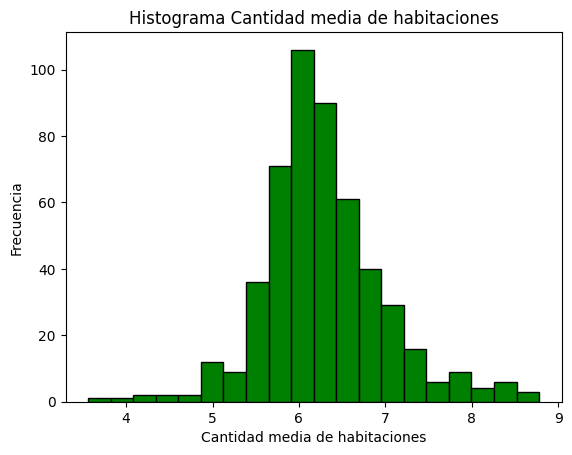

In [13]:
# Histograma para la distribución de la cantidad media de habitaciones en el estudio realizado (RM)

plt.hist(df['RM'], bins=20, color='green', edgecolor='black')
plt.title('Histograma Cantidad media de habitaciones')
plt.xlabel('Cantidad media de habitaciones')
plt.ylabel('Frecuencia')
plt.show()


Dispersión: sirve para representar la relación entre dos
variables. Para nuestro caso se desea ver la relación entre índice
de crimen y el valor mediano de las casas. En otras palabras, ¿el
índice de crimen afecta el valor medio de las casas?


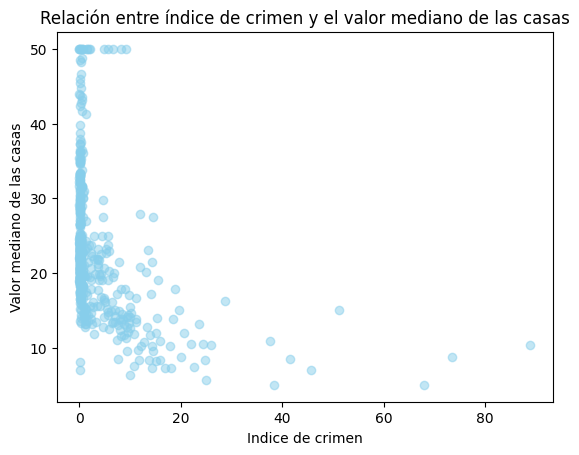

In [16]:
#CRIM: índice de crimen / MEDV: valor medio de las viviendas
plt.scatter(df['CRIM'], df['MEDV'], alpha=0.5, color='skyblue') #alpha índica nivel de transparencia de los puntos, 0:transparentes 1:opacos
plt.title('Relación entre índice de crimen y el valor mediano de las casas')
plt.xlabel('Indice de crimen')
plt.ylabel('Valor mediano de las casas')
plt.show()

Existe una relación entre indice de crimen y valor de las casas, ya que a índice cero o cercano a cero existe una gran variabilidad entre los valores de las casas, encontrándose valores bajos, pero sobre todo valores más altos, en cambio a medida que aumenta el índice de crimen los valores de las casas van disminuyendo y manteniéndose bajos.

 Barras: Un gráfico de barras es útil para comparar una variable
entre distintos grupos o categorías. Por ejemplo, si quisiéramos
observar el valor medio de cada ciudad. Para nuestro caso se
desea agrupar por ciudad y toma la media del valor mediano.
Gráfica las 10 primeras ciudades.

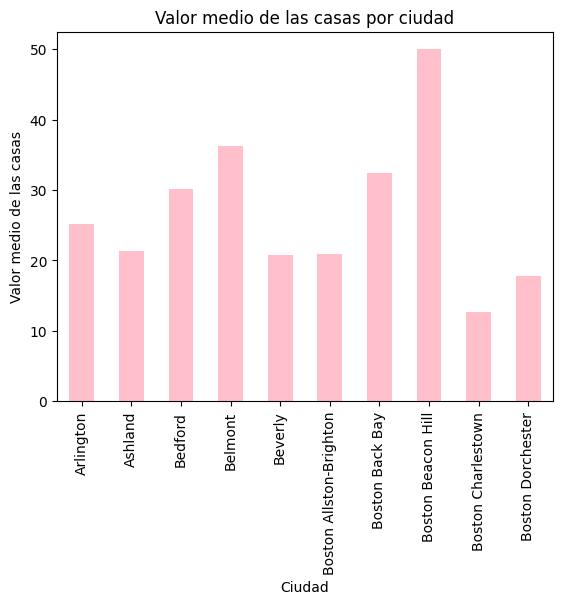

In [23]:
media_ciudades = df.groupby(['TOWN'])['MEDV'].mean().head(10)
#print(media_ciudades)
#plt.bar(media_ciudades, color='red')
media_ciudades.plot(kind='bar', color='pink')
plt.title('Valor medio de las casas por ciudad')
plt.xlabel('Ciudad')
plt.ylabel('Valor medio de las casas')
plt.show()

Cajas: Los diagramas de cajas son útiles para representar grupos
de datos y compararlos entre ellos. Otro uso importante es que
nos permiten identificar de forma sencilla si una variable tiene
muchos outliers (valores atípicos) esto es, elementos que se
alejan de los valores frecuentes de dicha variable. Para nuestro
caso, se desea ver los valores atípicos de índice de crimen en los
diferentes cuantiles de valor mediano.

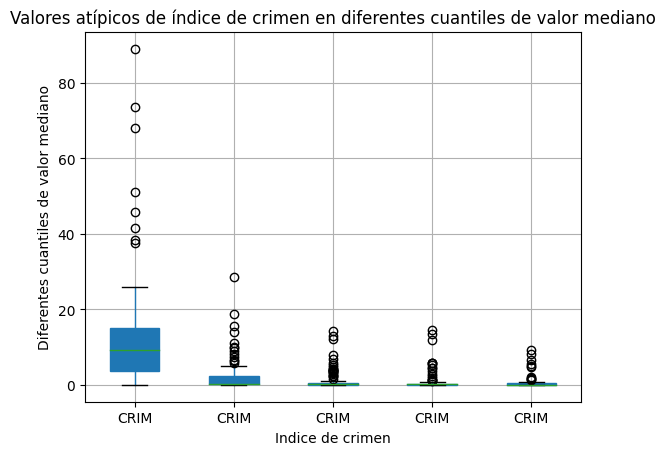

In [27]:
# Calcular los cuantiles de MEDV
df['Cuantiles'] = pd.qcut(df['MEDV'], 5)

# Iterar sobre los cuantiles y crear un gráfico de cajas para cada uno
positions = []
for label, group in df.groupby('Cuantiles'):
    boxplot = group.boxplot(column='CRIM', patch_artist=True, widths=0.5, positions=[len(positions)])
    positions.append(len(positions))

#df.boxplot(column='CRIM', by=pd.qcut(df['MEDV'], 5), vert=False)
plt.title('Valores atípicos de índice de crimen en diferentes cuantiles de valor mediano')
plt.xlabel('Indice de crimen')
plt.ylabel('Diferentes cuantiles de valor mediano')
plt.show()